In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ride_data=pd.read_csv("ride_data.csv")
citydata=pd.read_csv("city_data.csv")




In [2]:
rdgroup=ride_data.groupby(['city','date','fare','ride_id'])

a=int(len(rdgroup))
b=int(len(ride_data))

print(b)


2375


In [3]:
c=citydata['city'].nunique()
d=citydata['city'].count()



cgroup=citydata.groupby(['city']+['type'])
city_data=cgroup['driver_count'].sum()
city_data=city_data.reset_index()
e=citydata['city'].count()

print(e)


126


In [4]:
#merges files

city_ride=pd.merge(ride_data,citydata, how='left',on='city')

print(city_ride)


                      city                 date   fare        ride_id  \
0                 Sarabury  2016-01-16 13:49:27  38.35  5403689035038   
1                South Roy  2016-01-02 18:42:34  17.49  4036272335942   
2              Wiseborough  2016-01-21 17:35:29  44.18  3645042422587   
3              Spencertown  2016-07-31 14:53:22   6.87  2242596575892   
4               Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673   
5              New Jeffrey  2016-02-22 18:36:25  36.01  9757888452346   
6            Port Johnstad  2016-06-07 02:39:58  17.15  4352278259335   
7                Jacobfort  2016-09-20 20:58:37  22.98  1500221409082   
8              Travisville  2016-01-15 17:32:02  27.39   850152768361   
9               Sandymouth  2016-11-16 07:27:00  21.61  2389035050524   
10         New Andreamouth  2016-04-11 07:20:48   7.72  9992929847990   
11           New Christine  2016-09-13 15:06:42  24.89  7918411468537   
12             Stewartview  2016-03-29 05:15:56  23

In [5]:

#variables for bubble plot
grpcity=city_ride.groupby(['city']+['type']+['driver_count'])

In [6]:
#Calculate avg fare and total # of rides

avg_fare=grpcity['fare'].mean()
total_rides=grpcity['ride_id'].count()
df=pd.DataFrame({"AvgFare":avg_fare,"TotalRides":total_rides})
df=df.reset_index()


In [7]:
##scatter function
colors={'Urban':'lightcoral','Suburban':'lightskyblue','Rural':'gold'}


Text(0.5,1,'Pyber Ride Sharing Data')

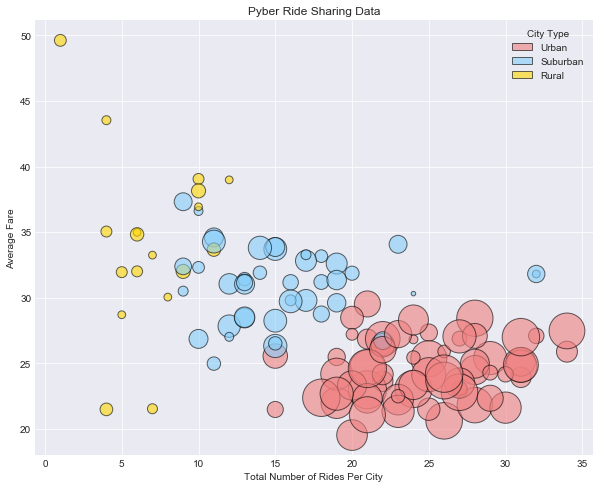

In [8]:
#assign colors
import matplotlib.patches as mpatches

Ub=mpatches.Circle((0.5,0.5),0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
Su=mpatches.Circle((0.5,0.5),0.1, facecolor="lightskyblue",alpha=.6, edgecolor="black",linewidth=1)
Ru=mpatches.Circle((0.5,0.5),0.1, facecolor="gold",alpha=.6, edgecolor="black",linewidth=1)

#Draw bubble chart

sns.set_style("darkgrid")
fig, ax=plt.subplots(figsize=(10,8))
ax.scatter(df['TotalRides'],df['AvgFare'],s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6,linewidth=1, edgecolor='black')
ax.legend([Ub,Su,Ru],["Urban","Suburban","Rural"], title='City Type')


ax.set_xlabel("Total Number of Rides Per City")
ax.set_ylabel("Average Fare")
ax.set_title("Pyber Ride Sharing Data")


In [9]:
#variables for pie
gtype=city_ride.groupby(['type'])
ggtype=city_data.groupby(['type'])


In [10]:
#fare per city type

totalfare=gtype['fare'].sum()


In [11]:
##rides per city type
trides=gtype['ride_id'].count()

In [12]:
##total drivers per city type
tdrivers=ggtype['driver_count'].sum()

df1=pd.DataFrame({"TotalFare":totalfare,"TotalRides":trides,"TotalDrivers":tdrivers})
df1=df1.reset_index()
df1

,type,TotalDrivers,TotalFare,TotalRides
0,Rural,104,4255.09,125
1,Suburban,638,20335.69,657
2,Urban,2607,40078.34,1625


In [13]:


#labels for sections of pie

labels=df1['type']


In [14]:
#values of each section of pie
sizes=df1['TotalFare']


In [15]:
#sets colors of each section

colors= ["gold","lightskyblue","lightcoral"]

In [16]:
explode=(0,0,0.3)


In [17]:
plt.figure(figsize=(9,5))

<function matplotlib.pyplot.show>

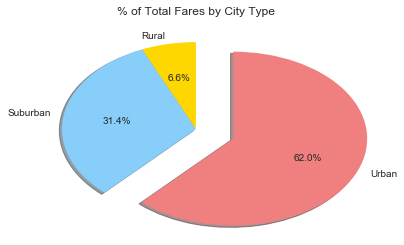

In [18]:
plt.pie(sizes, explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)


plt.title("% of Total Fares by City Type")
plt.show

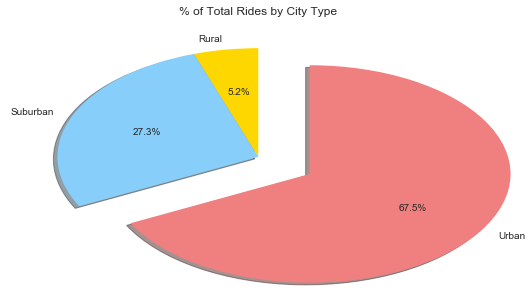

In [19]:
#% of Total Rides by City Type

labels=df1['type']
sizes=df1['TotalRides']
colors=["gold","lightskyblue","lightcoral"]
explode=(0,0,0.3)
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")
plt.show()
         

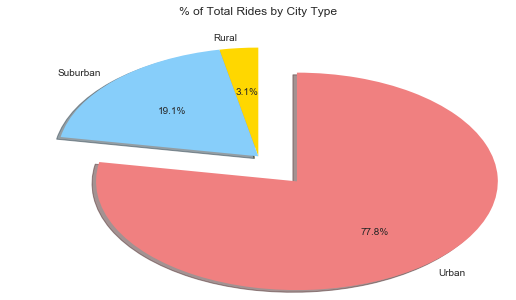

In [20]:
#% of Total Drivers by City Type

labels=df1['type']
sizes=df1['TotalDrivers']
colors=["gold","lightskyblue","lightcoral"]
explode=(0,0,0.3)
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")
plt.show()
         